<a href="https://colab.research.google.com/github/jsprk531/CNN-MNIST-PyTorch/blob/main/CNN_MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
# Device setting
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [ ]:
# Define hyperparameter
NUM_CLASSES = 10
LEARNING_RATE = 0.001
BATCH_SIZE = 64
NUM_EPOCHS = 5

In [ ]:
# Set transfor to normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
# DataLoading
train_dataset = datasets.MNIST(
    '~/datasets',
    train=True,
    transform=transform,
    download=True
)
test_dataset = datasets.MNIST(
    '~/datasets',
    train=False,
    transform=transform,
    download=True
)

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 38.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.07MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.91MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.00MB/s]


In [ ]:
# Data size check
data = iter(train_dataloader)
samples, labels = next(data)
print(f"number of samples: {samples.shape}")
print(f"number of labels: {labels.shape}")

number of samples: torch.Size([64, 1, 28, 28])
number of labels: torch.Size([64])


<function matplotlib.pyplot.show(close=None, block=None)>

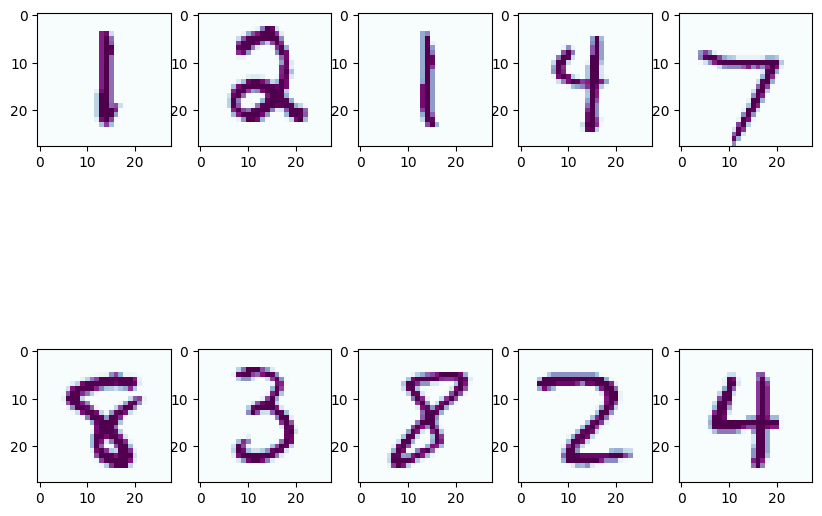

In [ ]:
# Show sample data
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(samples[i][0], cmap='BuPu')
plt.show

In [ ]:
# Module set up
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [ ]:
# Set model, criterion (loss function), and optimizer
model = CNNClassifier(num_classes=NUM_CLASSES).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
# Loss list
loss_list, test_accuracy_list = [], []

In [ ]:
# Training loop
print("\nStarting training...")
for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0

    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}", leave=False)

    for images, labels in progress_bar:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss:.4f}")
    loss_list.append(avg_loss)

    # Eval
    print("Evaluating on test data...")
    model.eval()

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    test_accuracy_list.append(accuracy)

print("\nFinished Training!")


Starting training...


Epoch 1/5, Loss: 0.0321
Evaluating on test data...
Test Accuracy: 98.88%


Epoch 2/5, Loss: 0.0289
Evaluating on test data...
Test Accuracy: 98.87%


Epoch 3/5, Loss: 0.0266
Evaluating on test data...
Test Accuracy: 98.69%


Epoch 4/5, Loss: 0.0236
Evaluating on test data...
Test Accuracy: 98.95%


Epoch 5/5, Loss: 0.0221
Evaluating on test data...
Test Accuracy: 99.03%

Finished Training!


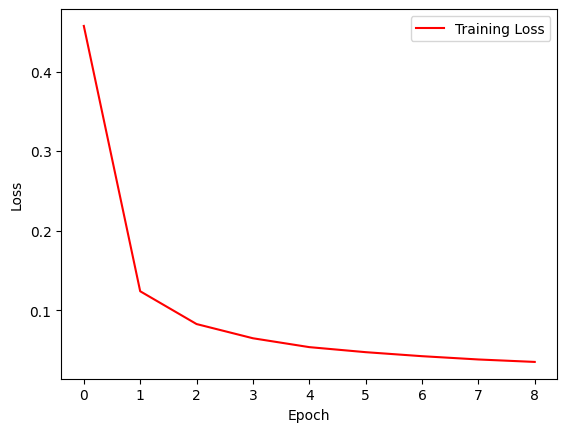

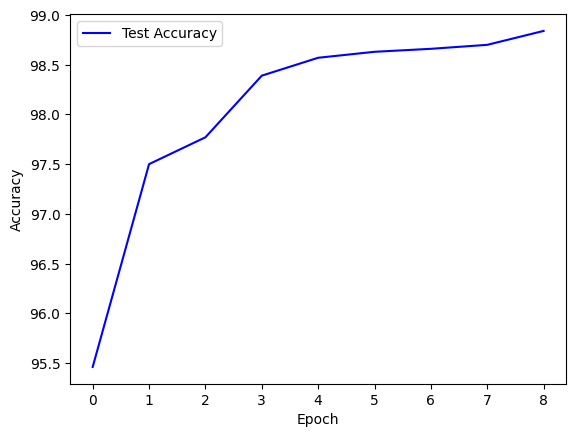

In [ ]:
# Loss and Test Accuracy Plot
plt.plot(range(len(loss_list)), loss_list, label='Training Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(range(len(test_accuracy_list)), test_accuracy_list, label='Test Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/model_weight_CNN-MNIST-PyTorch-0-14.pth')

In [ ]:
model.load_state_dict(torch.load('model_weight_CNN-MNIST-PyTorch-0-14.pth'))

FileNotFoundError: [Errno 2] No such file or directory: 'model_weight_CNN-MNIST-PyTorch-0-14.pth'

In [ ]:
from torchvision import transforms
from PIL import Image
import torch

img = Image.open('/content/drive/MyDrive/IMG_4218.jpeg').convert('L')
img = img.resize((28, 28))  # Resize to model input size

transform_to_tensor = transforms.ToTensor()
img_tensor = transform_to_tensor(img)

# If model expects non-inverted images, do not invert:
img_tensor = 1.0 - img_tensor  # Comment this if not needed

normalize = transforms.Normalize((0.5,), (0.5,))
# img_tensor = normalize(img_tensor)

input_tensor = img_tensor.unsqueeze(0).to(device)  # add batch dim and move device

output = model(input_tensor)
predicted_class = output.argmax(dim=1).item()

print(predicted_class)


import matplotlib.pyplot as plt
import numpy as np

img_show = img_tensor * 0.5 + 0.5  # unnormalize
img_np = img_show.squeeze(0).cpu().numpy()

plt.imshow(img_np, cmap='BuPu')
plt.axis('off')
plt.show()


NameError: name 'device' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
